In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

plt.rc('font',family ='serif')
plt.rc('text',usetex =True)

## Magnetic resonance

In [2]:
hbar = 4.135667696*10**-15
g = 2
q = 4.803207 *10**(-10) # in Gaussian units
m = 1.883533* 10**(-25)  
c = 3.0*10**10
B0 = 60
B1 = 6
w00 = g*q/(2*m*c)*B0
w1 = g*q/(2*m*c)*B1
T1 = 2*np.pi/w1 #12 microscond 12*10^-6

In [11]:
def f(Psi,t,params):
    w0,w1,w = params
    w0 = w0*w00
    w1 = w1*w00
    w = w*w00
    aR = Psi[0]
    aI = Psi[1]
    bR = Psi[2]
    bI = Psi[3]
    daR = 1/2*(w0*aI+w1*np.cos(w*t)*bI)
    daI = -1/2*(w0*aR+w1*np.cos(w*t)*bR)
    dbR =  1/2*(w1*np.cos(w*t)*aI-w0*bI)
    dbI =  -1/2*(w1*np.cos(w*t)*aR-w0*bR)
    
    return np.array([daR,daI,dbR,dbI])



In [64]:
def plot_prob(w0,w1,w):
    t = np.linspace(0,3*T1,600)
    params = [w0,w1,w]
    psoln = odeint(f, r0, t, args=(params,))
    aR = psoln[:,0]
    aI = psoln[:,1]
    bR = psoln[:,2]
    bI = psoln[:,3]
    P_up = list(map(lambda r,i: abs(r+i*1j)**2,aR,aI))
    P_down = list(map(lambda r,i: abs(r+i*1j)**2,bR,bI))
    f0,f1,fap = np.array([w0,w1,w])*800 #kHZ for plot title

    fig,ax= plt.subplots(figsize=(15,7))
    ax.plot(t,P_up,label='Probability of spin up $| \langle +z | \psi \\rangle |^2$')
    ax.plot(t,P_down,label='Probability of spin down $| \langle -z | \psi \\rangle |^2$')
    ax.set_title('$f_0= %0.2f kHz$, $f_1 = %0.2f kHz$(applied field strength), $f = %0.2f kHz$(applied field frequency)'%(f0,f1,fap), fontsize=30)
    ax.set_xlim(0,3*T1)
    ax.legend(loc='upper right', fontsize='xx-large')
    # ax.set_ylabel('$Probablity$ ')
    ax.set_xlabel('$t$')
    ax.set_xticks(np.arange(0,3*T1,T1/2))
    ax.grid(True)
    transition_rate = np.max(P_down)
    ax.annotate("Transition rate = %0.2f"%transition_rate, (0.63,0.71),xycoords = "figure fraction", fontsize = 20)

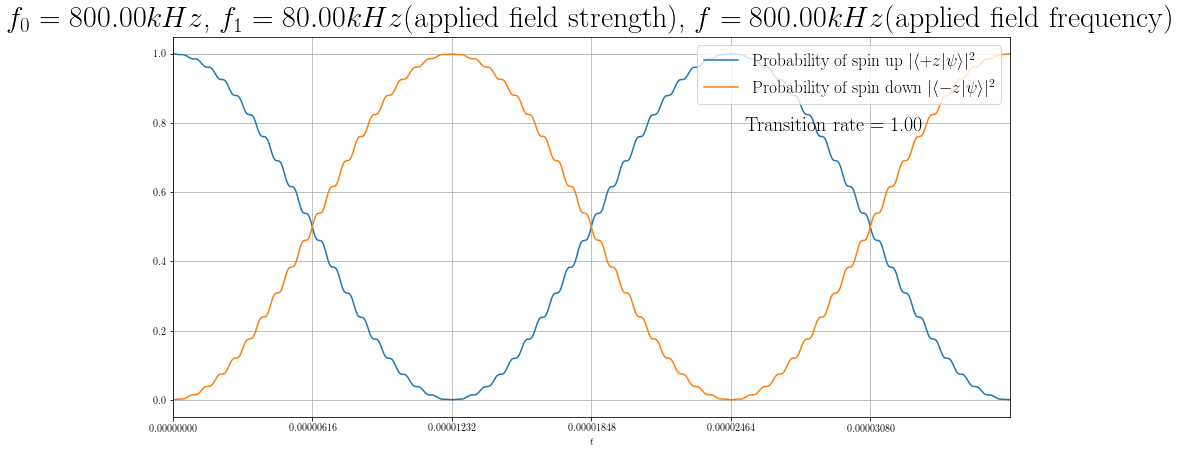

In [65]:
r0=[1.,0.,0.,0.]
plot_prob(1,0.1,1)

In [46]:
import ipywidgets as widgets
from ipywidgets import interact, interact_manual

In [66]:
r0=[1.,0.,0.,0.]
interact(plot_prob, w0 = widgets.FloatSlider(min=0, max=2,step=0.05,value=1., description='DC $\omega_0$'),
         w1 = widgets.FloatSlider(min=0.01, max=2.01,step=0.05, description='AC $\omega_1$'),
         w = widgets.FloatSlider(min=0, max=2,step=0.05, value=1,description='Applied $\omega$'))
plt.show()

interactive(children=(FloatSlider(value=1.0, description='DC $\\omega_0$', max=2.0, step=0.05), FloatSlider(value=0.01, description='AC $\\omega_1$', max=2.01, min=0.01, step=0.05), FloatSlider(value=1.0, description='Applied $\\omega$', max=2.0, step=0.05), Output()), _dom_classes=('widget-interact',))

In [142]:
r0=[1.,0.,0.,0.]
def plot_transition_rate(w0,w1): 
    #b the factor between B0 and B1
    w_list = np.arange(0.6,1.4,0.02)
    rate = []
    for wi in w_list:
        w = wi
        t = np.linspace(0,1.1*T1,600)
        params = [w0,w1,w]
        psoln = odeint(f, r0, t, args=(params,))
        aR = psoln[:,0]
        aI = psoln[:,1]
        bR = psoln[:,2]
        bI = psoln[:,3]
        P_up = list(map(lambda r,i: abs(r+i*1j)**2,aR,aI))
        P_down = list(map(lambda r,i: abs(r+i*1j)**2,bR,bI))
        transition_rate = np.max(P_down)
        rate.append(transition_rate)
    fig2,ax2 = plt.subplots(figsize=(15,7))
    ax2.plot(w_list,rate,'o-',markersize=8)
    ax2.grid(True)
    ax2.set_xlabel('$\\frac{\omega}{\omega_0}$', fontsize=20)
    ax2.set_title('Transtion Rate vs oscillating field frequency $\omega$', fontsize=20)
    ax2.xaxis.set_label_coords(1.01, -0.01)
#     ax.set_xticks(np\.arange(0,3,1))
#     ax.set_xticklabels(['','$\\frac{1}{\omega_1}$','$\\frac{2 \pi }{\omega_1}$','$\\frac{3 \pi }{\omega_1}$','$\\frac{4 \pi }{\omega_1
#    

In [144]:
interact(plot_transition_rate, w0 = widgets.FloatSlider(min=0, max=2,step=0.05,value=1., description='DC $B_0$ $\omega_0$'),
         w1 = widgets.FloatSlider(min=0.01, max=2.01,step=0.05,value=0.1, description='AC $B1$ $\omega_1$'))
plt.show()

interactive(children=(FloatSlider(value=1.0, description='DC $B_0$ $\\omega_0$', max=2.0, step=0.05), FloatSlider(value=0.1, description='AC $B1$ $\\omega_1$', max=2.01, min=0.01, step=0.05), Output()), _dom_classes=('widget-interact',))

### Precision in a constant B field

In [116]:
r0 = [1/np.sqrt(2),0,1/np.sqrt(2),0] # start in +x>
w1=0
T0 = 2*np.pi/w00
## let's look at how sz,sx and sy change

In [129]:
t = np.linspace(0,3*T0,600)
params = [w0,w1,w]
psoln = odeint(f, r0, t, args=(params,))
AR = psoln[:,0]
AI = psoln[:,1]
BR = psoln[:,2]
BI = psoln[:,3]
P_zup = list(map(lambda r,i: abs(r+i*1j)**2,AR,AI))
P_zdown = list(map(lambda r,i: abs(r+i*1j)**2,BR,BI))

In [139]:
P_xup = list(map(lambda ar,ai,br,bi: abs(ar+br+1j*(ai+bi))**2/2, AR,AI,BR,BI))
P_xdown = list(map(lambda ar,ai,br,bi: abs(ar-br+1j*(ai-bi))**2/2, AR,AI,BR,BI))
P_yup = list(map(lambda ar,ai,br,bi: abs(ar-bi+1j*(ai+br))**2/2, AR,AI,BR,BI))
P_ydown = list(map(lambda ar,ai,br,bi: abs(ar+bi+1j*(ai-br))**2/2, AR,AI,BR,BI))

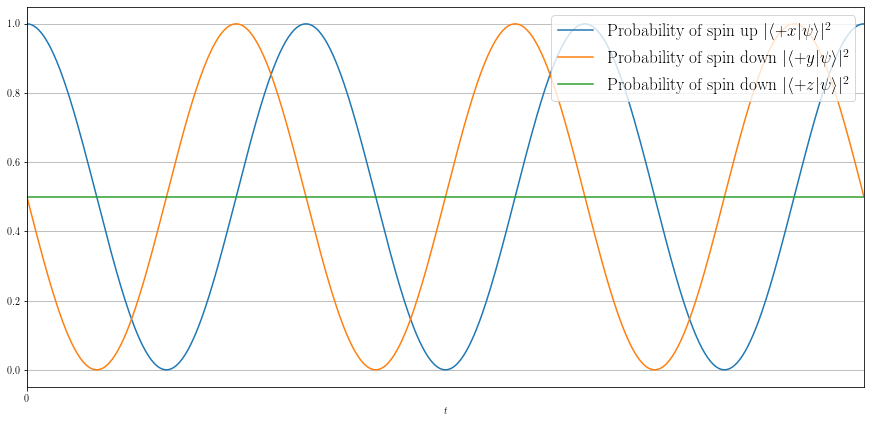

In [141]:
fig,ax= plt.subplots(figsize=(15,7))
ax.plot(t,P_xup,label='Probability of spin up $| \langle +x | \psi \\rangle |^2$')
ax.plot(t,P_yup,label='Probability of spin down $| \langle +y | \psi \\rangle |^2$')
ax.plot(t,P_zup,label='Probability of spin down $| \langle +z | \psi \\rangle |^2$')
ax.set_xlim(0,3*T0)
ax.legend(loc='upper right', fontsize='xx-large')
# ax.set_ylabel('$Probablity$ ')
ax.set_xlabel('$t$')
ax.set_xticks(np.arange(0,3*T0,T1/2))
ax.grid(True)
transition_rate = np.max(P_down)
